In [1]:
import yfinance as yf
import keras.backend as K
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Dropout, BatchNormalization, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras.models import Sequential
from keras.optimizer_v2.adam import Adam
from keras.optimizer_v2.rmsprop import RMSprop
import talib
from tensorflow.keras import layers

2022-03-07 04:18:32.108303: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 04:18:32.108347: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
linear_model = tf.keras.Sequential([
    layers.Dense(units=1)
])


2022-03-07 04:18:33.727000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-07 04:18:33.727267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-07 04:18:33.727305: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-07 04:18:33.727334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-07 04:18:33.727362: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [3]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [4]:
data = yf.download('0700.hk')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-06-16,0.875,0.925,0.815,0.830,0.802119,2198875000
2004-06-17,0.830,0.875,0.825,0.845,0.816615,419007500
2004-06-18,0.840,0.850,0.790,0.805,0.777959,182990000
2004-06-21,0.820,0.825,0.790,0.800,0.773127,114085000
2004-06-22,0.800,0.800,0.800,0.800,0.773127,0


In [5]:
data['Next Day Price']=data['Close'].shift(-1)
data

,Open,High,Low,Close,Adj Close,Volume,Next Day Price
Date,,,,,,,
2004-06-16,0.875000,0.925000,0.815000,0.830000,0.802119,2198875000,0.845000
2004-06-17,0.830000,0.875000,0.825000,0.845000,0.816615,419007500,0.805000
2004-06-18,0.840000,0.850000,0.790000,0.805000,0.777959,182990000,0.800000
2004-06-21,0.820000,0.825000,0.790000,0.800000,0.773127,114085000,0.800000
2004-06-22,0.800000,0.800000,0.800000,0.800000,0.773127,0,0.885000
...,...,...,...,...,...,...,...
2022-02-28,420.000000,425.399994,414.399994,421.200012,421.200012,26849319,431.000000
2022-03-01,421.200012,439.000000,420.399994,431.000000,431.000000,19308969,423.399994
2022-03-02,427.000000,434.799988,422.799988,423.399994,423.399994,14011686,418.799988


In [6]:
# Split the data into train and test with 90 & 10 % respectively
X=data.drop('Next Day Price',1)
y=data['Next Day Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

/tmp/ipykernel_9225/376338805.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Next Day Price',1)


In [7]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)


CPU times: user 9.14 s, sys: 3.12 s, total: 12.3 s
Wall time: 7.11 s


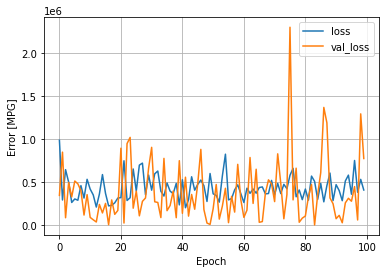

In [12]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)


In [21]:
y_pred=linear_model.predict(X_test)

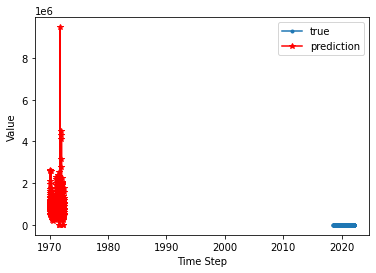

In [23]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r',marker='*', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()